# Домашнее задание "Продвинутая оптимизация".
# Задание
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
result.nit

90

In [21]:
mit_p = []
mit_s = []
mit_m = []
str_1 = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
for i in range(12):
  
  #miter.append(differential_evolution(ackley, bounds, seed=42, maxiter=j).nit)
  mit_p.append(differential_evolution(ackley, bounds, seed=42, popsize=i*10).nit)
  mit_m.append(differential_evolution(ackley, bounds, seed=42, mutation = (i/100,i/10)).nit)
for i in str_1:
  mit_s.append(differential_evolution(ackley, bounds, seed=42, strategy = i).nit)
  
mit_p, mit_s, mit_m

([7, 97, 95, 99, 98, 98, 98, 96, 95, 96, 101, 100],
 [90, 140, 241, 160, 1000, 244, 363, 101, 1000, 166, 232, 168],
 [3, 3, 4, 4, 5, 34, 36, 40, 43, 10, 55, 64])

In [20]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

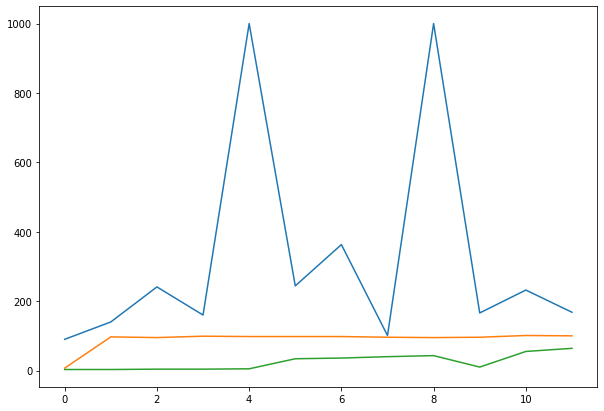

In [22]:

plt.figure(figsize=(10,7))
plt.plot(x, mit_s)
plt.plot(x, mit_p)
plt.plot(x, mit_m)

plt.show()

# Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):


Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
met = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'SLSQP', 'trust-constr']
res2 = []
res3 = []

for i in met:
  res2.append(minimize(ackley, x0,  method=i).nit)
  res3.append(minimize(ackley, x0,  method=i).nfev) 

res2, res3

([8, 1, 0, 0, 0, 0, 5, 27], [17, 63, 216, 216, 63, 5, 35, 81])

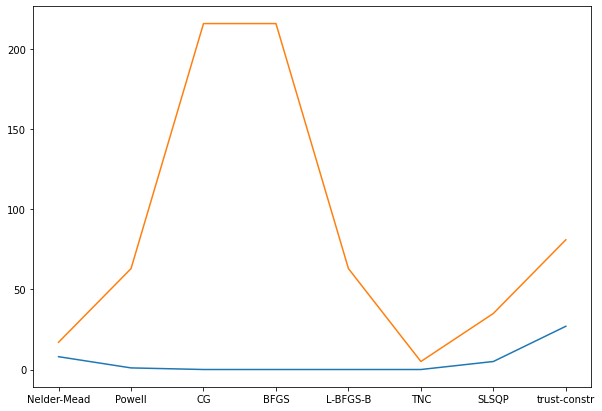

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(met, res2)
plt.plot(met, res3)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

%matplotlib inline


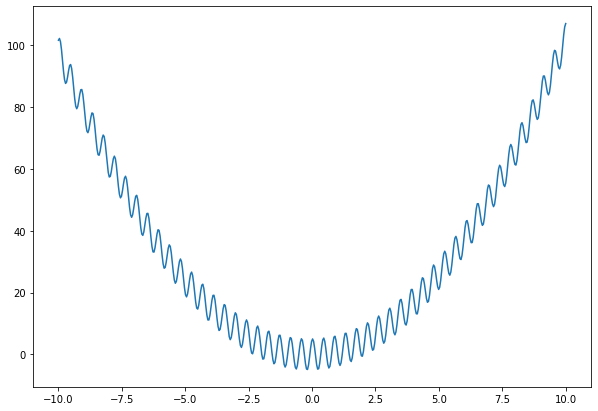

In [ ]:
def f(x):
    return 5 * np.cos(14.5 * x - 0.3) + (x + 0.2) * x

x = np.linspace(-10, 10, 500)
fx = f(x)

plt.figure(figsize=(10,7))
plt.plot(x, fx)
plt.show()


In [ ]:
x0=[1.]

minimizer_kwargs = {'method': 'BFGS'}
ret = basinhopping(f, x0, minimizer_kwargs=minimizer_kwargs, niter=20)
print('global minimum: x = %.4f, f(x) = %.4f' % (ret.x, ret.fun))


global minimum: x = 0.2367, f(x) = -4.8964


Добрый день, Алексей!

Спасибо за выполненное задание.

Комментарий:
- В задании требовалось проэкспериментировать с функцией differential_evolution() и параметрами strategy, popsize, mutation, у вас только popsize; добавлю, лучше визуализировать графики количества итераций с учётом используемых значений перебираемого параметра.

Если остались вопросы, с удовольствием отвечу на них в личных сообщениях.

Доработайте и присылайте работу :)

Добрый день, Алексей!

Спасибо за выполненное задание.

Комментарии (рекомендации по улучшению):
- Главное - не забывать про глобальный оптимум функции Ackley;
- Лучше было визуализировать графики количества итераций по отдельности и с учётом используемых значений перебираемого параметра, у вас же i*10, i/100,i/10, и другие.

Хорошо проэкспериментировали!

Работа зачтена.

Если остались вопросы, с удовольствием отвечу на них в личных сообщениях.

Удачи в дальнейшей учёбе!

